#Importing Liberaries

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



In [83]:
# Read the data
df=pd.read_csv('Fraud.csv')
df.shape

(736848, 11)

In [84]:
# Get head of the data
df.head(500)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
495,1,CASH_IN,160347.32,C1972143064,7965270.68,8125617.99,C33524623,724867.22,1517262.16,0.0,0.0
496,1,CASH_IN,289272.75,C312168418,8125617.99,8414890.75,C75457651,413976.60,31469.78,0.0,0.0
497,1,CASH_IN,63189.26,C95369743,8414890.75,8478080.00,C1860513229,101925.00,0.00,0.0,0.0
498,1,CASH_IN,196725.32,C26928827,8478080.00,8674805.32,C451111351,2248012.90,3940085.21,0.0,0.0


In [85]:
df.tail(500)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
736348,38,TRANSFER,1026613.83,C1497674263,11094.0,0.00,C916789199,252770.81,1279384.63,0.0,0.0
736349,38,TRANSFER,406648.58,C686769896,0.0,0.00,C1430389697,426144.99,832793.57,0.0,0.0
736350,38,CASH_OUT,33274.27,C421438609,65.0,0.00,C1111188075,162593.15,195867.43,0.0,0.0
736351,38,PAYMENT,10955.72,C159254838,0.0,0.00,M1968625156,0.00,0.00,0.0,0.0
736352,38,CASH_OUT,166153.15,C668735040,121308.0,0.00,C1279063877,874911.25,1041064.40,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
736843,38,TRANSFER,761818.36,C1217745649,1664.0,0.00,C1975895367,453866.55,1215684.91,0.0,0.0
736844,38,CASH_IN,127704.32,C1494181141,44847.0,172551.32,C1636526944,10753064.50,10699777.64,0.0,0.0
736845,38,CASH_OUT,41141.20,C2081612363,104045.0,62903.80,C1123923904,0.00,41141.20,0.0,0.0
736846,38,PAYMENT,7367.24,C599558544,62903.8,55536.56,M1104958924,0.00,0.00,0.0,0.0


#Data Cleaning

In [86]:
# Check for null values
df.isnull().values.any()

True

In [87]:
df_dp = df.dropna()
print("\nDataFrame after removing rows with missing values:")
print(df_dp)



DataFrame after removing rows with missing values:
        step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0          1   PAYMENT    9839.64  C1231006815       170136.0       160296.36   
1          1   PAYMENT    1864.28  C1666544295        21249.0        19384.72   
2          1  TRANSFER     181.00  C1305486145          181.0            0.00   
3          1  CASH_OUT     181.00   C840083671          181.0            0.00   
4          1   PAYMENT   11668.14  C2048537720        41554.0        29885.86   
...      ...       ...        ...          ...            ...             ...   
736842    38   PAYMENT   13500.90  C1918565467       201019.0       187518.10   
736843    38  TRANSFER  761818.36  C1217745649         1664.0            0.00   
736844    38   CASH_IN  127704.32  C1494181141        44847.0       172551.32   
736845    38  CASH_OUT   41141.20  C2081612363       104045.0        62903.80   
736846    38   PAYMENT    7367.24   C599558544        629

#Analyzing Data

In [88]:
df_dp.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,736847.000000,7.368470e+05,7.368470e+05,7.368470e+05,7.368470e+05,7.368470e+05,736847.000000,736847.0
mean,19.302734,1.638423e+05,8.753709e+05,8.956310e+05,9.811505e+05,1.137452e+06,0.000584,0.0
std,9.246884,2.696257e+05,2.938818e+06,2.975823e+06,2.317074e+06,2.459709e+06,0.024150,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,13.000000,1.295392e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,17.000000,7.874395e+04,1.665300e+04,0.000000e+00,1.209578e+05,2.185865e+05,0.000000,0.0
75%,22.000000,2.193005e+05,1.496120e+05,1.902127e+05,9.075471e+05,1.178238e+06,0.000000,0.0
max,38.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.148270e+07,1.000000,0.0


In [89]:
# Getting information about data
df_dp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736847 entries, 0 to 736846
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            736847 non-null  int64  
 1   type            736847 non-null  object 
 2   amount          736847 non-null  float64
 3   nameOrig        736847 non-null  object 
 4   oldbalanceOrg   736847 non-null  float64
 5   newbalanceOrig  736847 non-null  float64
 6   nameDest        736847 non-null  object 
 7   oldbalanceDest  736847 non-null  float64
 8   newbalanceDest  736847 non-null  float64
 9   isFraud         736847 non-null  float64
 10  isFlaggedFraud  736847 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 67.5+ MB


In [90]:
# Merchants
X = df_dp[df_dp['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0.0,0.0


In [91]:
# Calculate the number of legitimate transactions
num_legit_transactions = len(df_dp[df_dp.isFraud == 0])

# Calculate the number of fraudulent transactions
num_fraud_transactions = len(df_dp[df_dp.isFraud == 1])

# Calculate the percentage of legitimate transactions
percentage_legit = (num_legit_transactions / (num_legit_transactions + num_fraud_transactions)) * 100

# Calculate the percentage of fraudulent transactions
percentage_fraud = (num_fraud_transactions / (num_legit_transactions + num_fraud_transactions)) * 100

# Print the results
print(f"Total number of legitimate transactions: {num_legit_transactions}")
print(f"Total number of fraudulent transactions: {num_fraud_transactions}")
print(f"Proportion of legitimate transactions: {percentage_legit:.4f}%")
print(f"Proportion of fraudulent transactions: {percentage_fraud:.4f}%")


Total number of legitimate transactions: 736417
Total number of fraudulent transactions: 430
Proportion of legitimate transactions: 99.9416%
Proportion of fraudulent transactions: 0.0584%


In [92]:
# Select only numeric columns
numeric_cols = df_dp.select_dtypes(include='number')

#Visualization

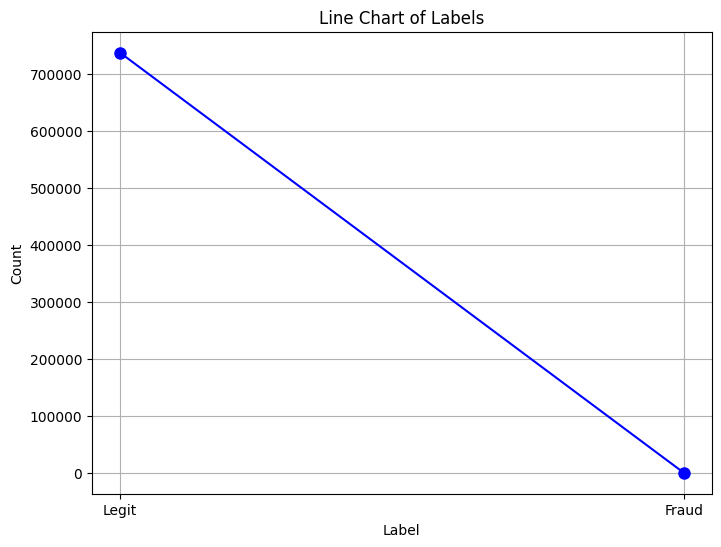

In [93]:
# Line chart
plt.figure(figsize=(8, 6))
labels = ["Legit", "Fraud"]
plt.plot(labels, count_classes, marker='o', linestyle='-', color='b', markersize=8)
plt.title("Line Chart of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(True)
plt.show()


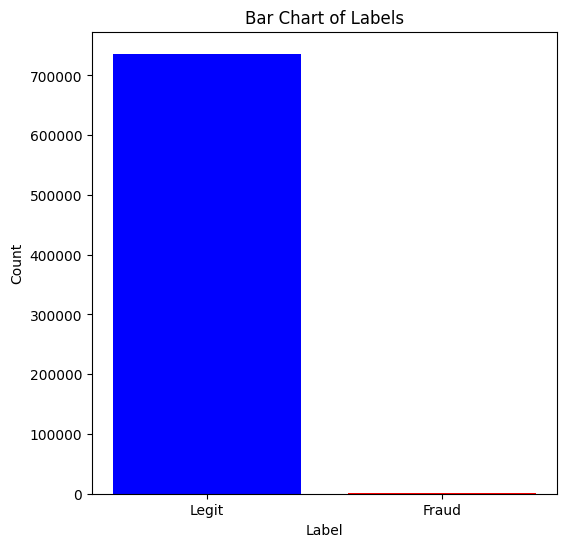

In [94]:
# Bar chart
plt.figure(figsize=(6, 6))
labels = ["Legit", "Fraud"]
colors = ['blue', 'red']
plt.bar(labels, count_classes, color=colors)
plt.title("Bar Chart of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

#New Data

In [95]:
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


#Label Encoding

In [96]:
# Checking how many attributes are dtype: object
objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [97]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736848 entries, 0 to 736847
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            736848 non-null  int64  
 1   type            736848 non-null  int64  
 2   amount          736848 non-null  float64
 3   nameOrig        736848 non-null  int64  
 4   oldbalanceOrg   736847 non-null  float64
 5   newbalanceOrig  736847 non-null  float64
 6   nameDest        736848 non-null  int64  
 7   oldbalanceDest  736847 non-null  float64
 8   newbalanceDest  736847 non-null  float64
 9   isFraud         736847 non-null  float64
 10  isFlaggedFraud  736847 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 61.8 MB
None


#Multi-Collinearity

In [98]:
def calc_vif(df):
    # Replace infinite values with NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Drop rows with NaN values
    df.dropna(inplace=True)

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return vif

calc_vif(new_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,step,3.348360
1,type,5.344778
2,amount,2.169572
3,nameOrig,3.005570
4,oldbalanceOrg,822.213618
5,newbalanceOrig,831.426488
6,nameDest,3.999508
7,oldbalanceDest,30.788305
8,newbalanceDest,33.254333
9,isFraud,1.047969


In [99]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)
#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)
calc_vif(new_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,type,2.845226
1,amount,1.738040
2,isFraud,1.045044
3,isFlaggedFraud,NaN
4,Actual_amount_orig,1.255422
5,Actual_amount_dest,1.527779
6,TransactionPath,2.740032


<Axes: >

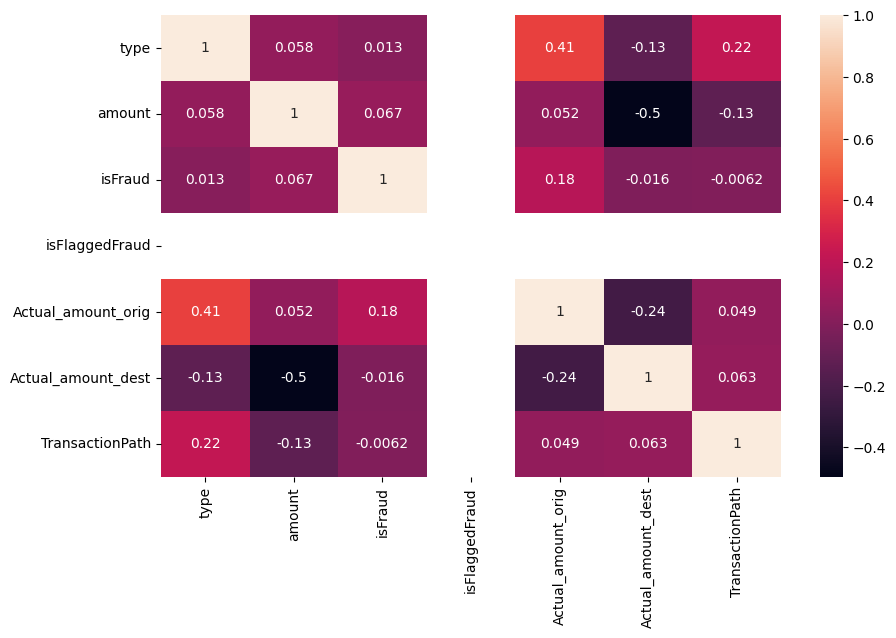

In [100]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

#Model training

In [101]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace=True, axis=1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis=1)

print(X.head())
print(Y.head())

   type  isFlaggedFraud  Actual_amount_orig  Actual_amount_dest  \
0     3             0.0             9839.64                 0.0   
1     3             0.0             1864.28                 0.0   
2     4             0.0              181.00                 0.0   
3     1             0.0              181.00             21182.0   
4     3             0.0            11668.14                 0.0   

   TransactionPath  NormalizedAmount  
0         282665.0         -0.571172  
1         456806.0         -0.600752  
2         169638.0         -0.606995  
3         723571.0         -0.606995  
4         498082.0         -0.564391  
0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: isFraud, dtype: float64


#Data-Splitting

In [102]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (515792, 6)
Shape of X_test:  (221055, 6)


#Random Forest

In [103]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [104]:
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.97376218588134


In [105]:
print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Random Forest
True Positives: 71
False Positives: 9
True Negatives: 220926
False Negatives: 49


#Confusion Matrix

In [106]:
confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[220926      9]
 [    49     71]]


#Classification Report

In [107]:
classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    220935
         1.0       0.89      0.59      0.71       120

    accuracy                           1.00    221055
   macro avg       0.94      0.80      0.85    221055
weighted avg       1.00      1.00      1.00    221055



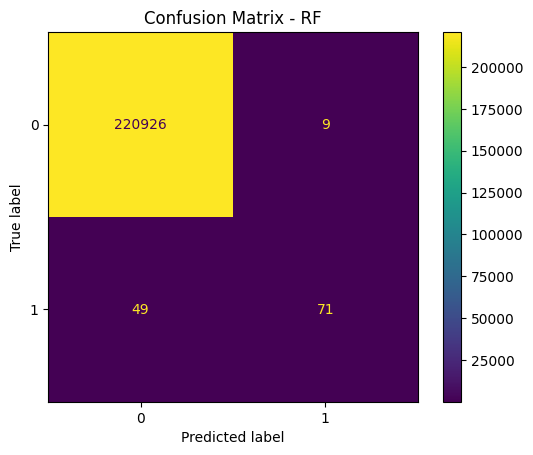

In [108]:
# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

#AUC ROC - DT

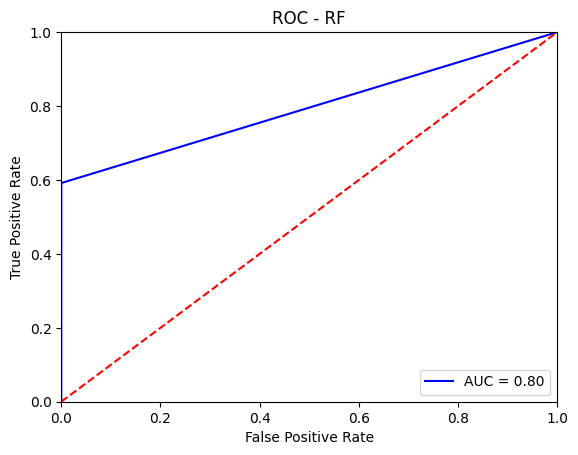

In [109]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Conclusion
In conclusion, the random forest model achieved an impressive 99% accuracy in identifying legitimate cases and demonstrated a 1% detection rate for fraud. This high precision ensures minimal false positives, crucial for safeguarding innocent parties from wrongful identification. Random forest's effectiveness in handling skewed class distributions allows it to detect subtle fraud patterns efficiently, making it a robust choice for fraud detection applications.
# 5. What are the key factors that predict fraudulent customer?
* Unusual transaction frequencies or timings suggest potential fraud.

* Abnormal purchase patterns, such as high-value or unusual category purchases, may indicate fraud.

* Detecting anomalies in device usage or IP addresses can flag suspicious activity.

#6. Do these factors make sense? If yes, How? If not, How not?

Yes, these factors make sence because:
* Ensure the use of trusted applications to avoid malware and phishing risks.

* Secure internet connections with VPNs for data protection and safer online activities.

* Regularly update security protocols on devices to prevent vulnerabilities.

* Promptly report suspicions of security breaches to mitigate risks effectively.

* Exercise caution and avoid responding to unsolicited communications to prevent falling victim to scams or phishing attempts.

#7. What kind of prevention should be adopted while company update its infrastructure?

* Redundancy Planning:Monitor failures of redundant systems and test methods.
* Vendor Support:Coordinate with vendors for alignment and technical support.
* Rolling out in stages: Apply updates in stages, checking each stage for issues.
* Stakeholder engagement: Regularly engage and notify stakeholders to address concerns.

#8. Assuming these actions have been implemented, how would you determine if they work?
*  System Performance Management: Monitor key performance indicators (KPIs) to ensure stability and efficiency.
*  Conduct post-date reviews: Use team presentations and stakeholder feedback to analyze policy updates and results.
* Test failed systems: Simulate its failure to ensure that redundant systems and failed systems are working properly.
*  User Feedback: Collect and analyze feedback from end users on any problems or improvements in system performance.
